In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import seaborn as sns
import missingno as msno
dataset = pd.read_csv('/content/gdrive/My Drive/Customer Data Analysis ML Models/Customer Churn Prediction/Churn Data/Customer Churn Full Dataset.csv')

In [3]:
dataset=dataset.drop(["NumberOfDeviceRegistered","SatisfactionScore","Complain","CouponUsed","DaySinceLastOrder","CashbackAmount"],axis='columns')
dataset.head()

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,Female,Laptop & Accessory,Single,9,1.0
1,50002,1,Male,Mobile & Accessory,Single,7,1.0
2,50003,1,Male,Mobile & Accessory,Single,6,1.0
3,50004,1,Male,Laptop & Accessory,Single,8,1.0
4,50005,1,Male,Mobile & Accessory,Single,3,1.0


In [4]:
dataset.shape

(5630, 7)

In [5]:
dataset.columns

Index(['CustomerID', 'Churn', 'Gender', 'PreferedOrderCat', 'MaritalStatus',
       'NumberOfAddress', 'OrderCount'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5630 non-null   int64  
 1   Churn             5630 non-null   int64  
 2   Gender            5630 non-null   object 
 3   PreferedOrderCat  5630 non-null   object 
 4   MaritalStatus     5630 non-null   object 
 5   NumberOfAddress   5630 non-null   int64  
 6   OrderCount        5372 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 308.0+ KB


In [7]:
dataset.describe()

,CustomerID,Churn,NumberOfAddress,OrderCount
count,5630.000000,5630.000000,5630.000000,5372.000000
mean,52815.500000,0.168384,4.214032,3.008004
std,1625.385339,0.374240,2.583586,2.939680
min,50001.000000,0.000000,1.000000,1.000000
25%,51408.250000,0.000000,2.000000,1.000000
50%,52815.500000,0.000000,3.000000,2.000000
75%,54222.750000,0.000000,6.000000,3.000000
max,55630.000000,1.000000,22.000000,16.000000


# **Handle Missing Value**

In [8]:
df=dataset

In [9]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(i)
        print('the total null values are:', df[i].isnull().sum())
        print('the datatype is', df[i].dtypes)
        print()

OrderCount
the total null values are: 258
the datatype is float64



In [10]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [11]:
dataset=df

In [12]:
df1=df.drop(["CustomerID"],axis='columns')

<ipython-input-13-169f71bfaa45>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


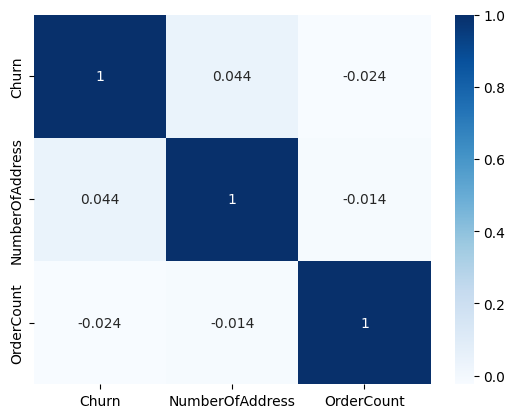

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df1.corr()
sns.heatmap(corr, cmap="Blues", annot=True)
plt.show()

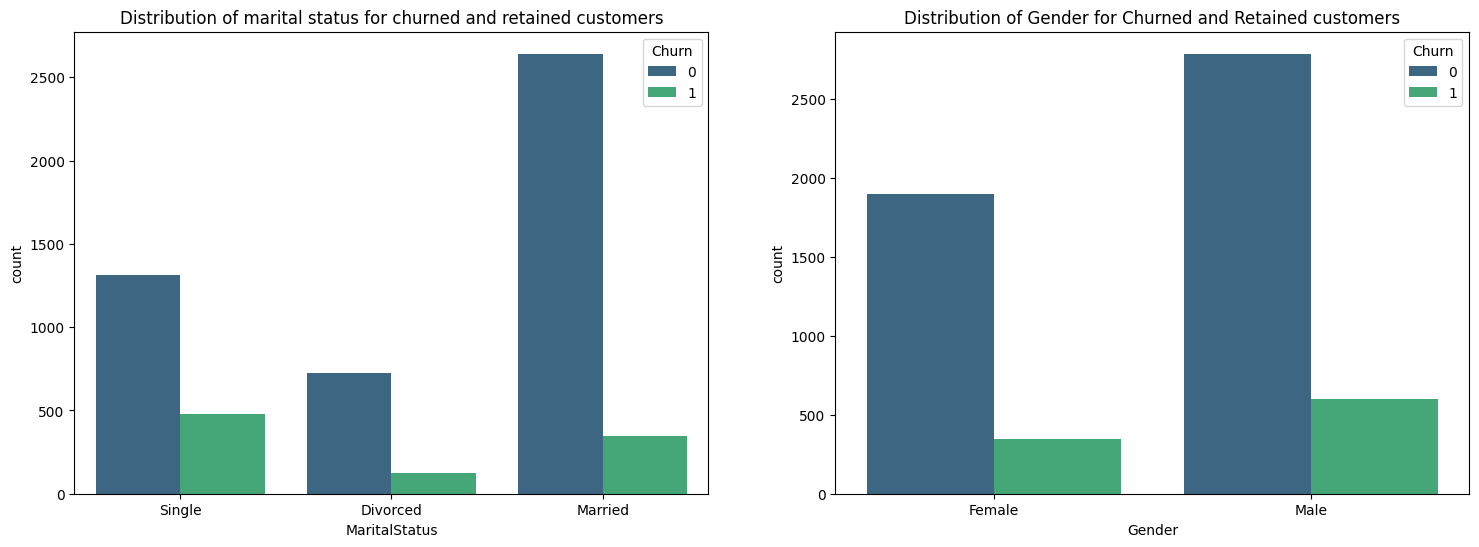

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# fig.suptitle('Geeksforgeeks - 2 x 3 axes Box plot with data')
sns.countplot(ax=axes[0], x='MaritalStatus', hue='Churn', palette='viridis', data=dataset).set(title='Distribution of marital status for churned and retained customers')
sns.countplot(ax=axes[1],x='Gender', hue='Churn', palette='viridis', data=dataset).set(title="Distribution of Gender for Churned and Retained customers")
plt.show()

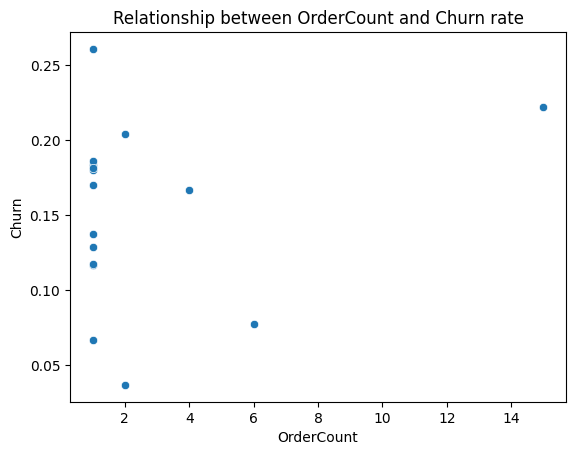

In [15]:
sns.scatterplot(x=dataset['OrderCount'],y=dataset.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

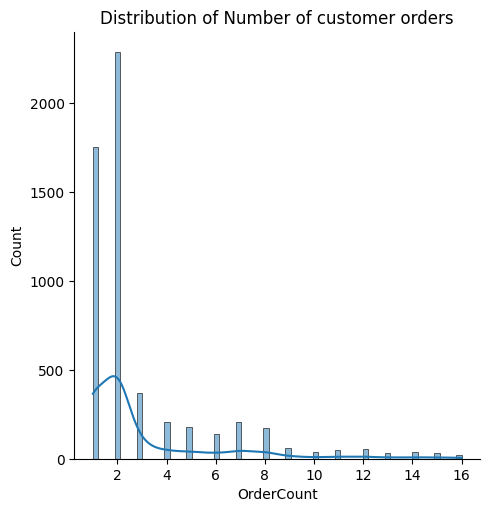

In [16]:
sns.displot(x='OrderCount', kde=True, data=dataset)
plt.title("Distribution of Number of customer orders")
plt.show()

# **Dataset Prepoceissing**

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])

In [18]:
dataset.head(5)

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,0,Laptop & Accessory,Single,9,1.0
1,50002,1,1,Mobile & Accessory,Single,7,1.0
2,50003,1,1,Mobile & Accessory,Single,6,1.0
3,50004,1,1,Laptop & Accessory,Single,8,1.0
4,50005,1,1,Mobile & Accessory,Single,3,1.0


In [19]:
df_encoded=dataset.copy()
df_encoded.head()

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount
0,50001,1,0,Laptop & Accessory,Single,9,1.0
1,50002,1,1,Mobile & Accessory,Single,7,1.0
2,50003,1,1,Mobile & Accessory,Single,6,1.0
3,50004,1,1,Laptop & Accessory,Single,8,1.0
4,50005,1,1,Mobile & Accessory,Single,3,1.0


In [20]:
dumies1 = pd.get_dummies(dataset['PreferedOrderCat'])
dumies2 = pd.get_dummies(dataset['MaritalStatus'])

In [21]:
dumies1.head(5)

,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0


In [22]:
dumies2.head(5)

,Divorced,Married,Single
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [23]:
marged=pd.concat([dataset,dumies1,dumies2],axis='columns')

In [24]:
marged.head(5)

,CustomerID,Churn,Gender,PreferedOrderCat,MaritalStatus,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,50001,1,0,Laptop & Accessory,Single,9,1.0,0,0,1,0,0,0,0,0,1
1,50002,1,1,Mobile & Accessory,Single,7,1.0,0,0,0,1,0,0,0,0,1
2,50003,1,1,Mobile & Accessory,Single,6,1.0,0,0,0,1,0,0,0,0,1
3,50004,1,1,Laptop & Accessory,Single,8,1.0,0,0,1,0,0,0,0,0,1
4,50005,1,1,Mobile & Accessory,Single,3,1.0,0,0,0,1,0,0,0,0,1


In [25]:
dt=marged.drop(["PreferedOrderCat","MaritalStatus","CustomerID"],axis='columns')

In [26]:
dt.head(10)

,Churn,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,1,0,9,1.0,0,0,1,0,0,0,0,0,1
1,1,1,7,1.0,0,0,0,1,0,0,0,0,1
2,1,1,6,1.0,0,0,0,1,0,0,0,0,1
3,1,1,8,1.0,0,0,1,0,0,0,0,0,1
4,1,1,3,1.0,0,0,0,1,0,0,0,0,1
5,1,0,2,6.0,0,0,0,0,1,0,0,0,1
6,1,1,4,1.0,0,0,1,0,0,0,1,0,0
7,1,1,3,2.0,0,0,0,1,0,0,1,0,0
8,1,1,2,1.0,0,0,0,1,0,0,1,0,0
9,1,1,2,1.0,0,0,0,1,0,0,0,0,1


# **Dependent and Independent Variable declare**

In [27]:
feature_variable = dt.drop(["Churn"],axis=1)
class_variable = dt["Churn"]

In [28]:
feature_variable

,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,0,9,1.0,0,0,1,0,0,0,0,0,1
1,1,7,1.0,0,0,0,1,0,0,0,0,1
2,1,6,1.0,0,0,0,1,0,0,0,0,1
3,1,8,1.0,0,0,1,0,0,0,0,0,1
4,1,3,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1,6,2.0,0,0,1,0,0,0,0,1,0
5626,1,6,2.0,1,0,0,0,0,0,0,1,0
5627,1,3,2.0,0,0,1,0,0,0,0,1,0
5628,1,4,2.0,0,0,1,0,0,0,0,1,0


In [29]:
class_variable.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

# **Scaling Dataset**

In [30]:
# from sklearn.preprocessing import StandardScaler

In [31]:
# x_train= StandardScaler().fit_transform(feature_varia
x=feature_variable

In [32]:
y=class_variable

# Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

# using the train test split function
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25, shuffle=True)

In [34]:
x_test

,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
3061,1,11,2.0,0,0,0,0,1,0,0,0,1
1379,1,3,2.0,0,0,0,1,0,0,0,1,0
2816,1,8,2.0,0,0,0,0,1,0,0,0,1
2697,1,3,2.0,0,0,1,0,0,0,0,1,0
3744,1,5,2.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1824,0,2,1.0,0,0,0,1,0,0,0,1,0
1657,1,1,2.0,0,0,0,1,0,0,0,1,0
2417,0,1,1.0,0,0,0,1,0,0,0,1,0
240,0,3,1.0,0,0,1,0,0,0,1,0,0


In [35]:
y_test

3061    0
1379    1
2816    1
2697    0
3744    0
       ..
1824    1
1657    0
2417    0
240     0
1095    0
Name: Churn, Length: 1408, dtype: int64

# **LogisticRegression Model**

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pred=model.predict(x_test)
train_pred=model.predict(x_train)

In [40]:
results = confusion_matrix(y_test,pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred))
print ('Classification Report : ')
print (classification_report(y_test,pred))
print('AUC-ROC:',roc_auc_score(y_test,pred))
print('LOGLOSS Value is',log_loss(y_test,pred))

Confusion Matrix :
[[1162    8]
 [ 238    0]]
Accuracy Score is 0.8252840909090909
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1170
           1       0.00      0.00      0.00       238

    accuracy                           0.83      1408
   macro avg       0.41      0.50      0.45      1408
weighted avg       0.69      0.83      0.75      1408

AUC-ROC: 0.4965811965811966
LOGLOSS Value is 6.2973996688372305


In [41]:
results = confusion_matrix(y_train,train_pred)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred))
print ('Classification Report : ')
print (classification_report(y_train,train_pred))
print('AUC-ROC:',roc_auc_score(y_train,train_pred))
print('LOGLOSS Value is',log_loss(y_train,train_pred))

Confusion Matrix :
[[3506    6]
 [ 703    7]]
Accuracy Score is 0.8320701089531028
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      3512
           1       0.54      0.01      0.02       710

    accuracy                           0.83      4222
   macro avg       0.69      0.50      0.46      4222
weighted avg       0.78      0.83      0.76      4222

AUC-ROC: 0.5040753633417819
LOGLOSS Value is 6.0528067865665705


# **Random Forest Model**

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [43]:
pred1=RF_model.predict(x_test)
train_pred1=RF_model.predict(x_train)

In [44]:
rf_test_acc=accuracy_score(y_test,pred1)
rf_train_acc=accuracy_score(y_train,train_pred1)
print(rf_test_acc)
print(rf_train_acc)

0.8210227272727273
0.8770724774988157


In [45]:
rf_test_results = confusion_matrix(y_test,pred1)
print ('Confusion Matrix of Random Forest Model Test Data:')
print(rf_test_results)

Confusion Matrix of Random Forest Model Test Data:
[[1099   71]
 [ 181   57]]


In [46]:
print ('Classification Report of Random Forest Model Test Data: ')
print (classification_report(y_test,pred1))
# print('AUC-ROC:',roc_auc_score(y_test,pred1))
# print('LOGLOSS Value is',log_loss(y_test,pred1))

Classification Report of Random Forest Model Test Data: 
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1170
           1       0.45      0.24      0.31       238

    accuracy                           0.82      1408
   macro avg       0.65      0.59      0.60      1408
weighted avg       0.79      0.82      0.80      1408



In [47]:
results = confusion_matrix(y_train,train_pred1)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred1))

Confusion Matrix :
[[3433   79]
 [ 440  270]]
Accuracy Score is 0.8770724774988157


In [48]:
print ('Classification Report of Random Forest Model Train Data: ')
print (classification_report(y_train,train_pred1))
# print('AUC-ROC:',roc_auc_score(y_train,train_pred1))
# print('LOGLOSS Value is',log_loss(y_train,train_pred1))

Classification Report of Random Forest Model Train Data: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3512
           1       0.77      0.38      0.51       710

    accuracy                           0.88      4222
   macro avg       0.83      0.68      0.72      4222
weighted avg       0.87      0.88      0.86      4222



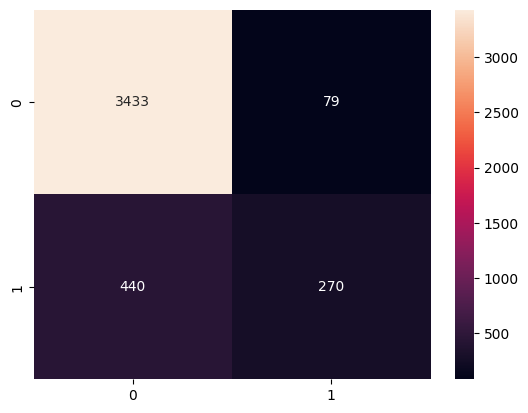

In [49]:
rf_mat = confusion_matrix(y_train,train_pred1)
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
pred2 = clf.predict(x_test)
train_pred2=clf.predict(x_train)

In [51]:
accuracy_score(y_test,pred2)

0.8252840909090909

In [52]:
results = confusion_matrix(y_test,pred2)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred2))
print ('Classification Report : ')
print (classification_report(y_test,pred2))
print('AUC-ROC:',roc_auc_score(y_test,pred2))
print('LOGLOSS Value is',log_loss(y_test,pred2))

Confusion Matrix :
[[1113   57]
 [ 189   49]]
Accuracy Score is 0.8252840909090909
Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1170
           1       0.46      0.21      0.28       238

    accuracy                           0.83      1408
   macro avg       0.66      0.58      0.59      1408
weighted avg       0.79      0.83      0.80      1408

AUC-ROC: 0.5785822021116138
LOGLOSS Value is 6.2973996688372305


In [53]:
results = confusion_matrix(y_train,train_pred2)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred2))
print ('Classification Report : ')
print (classification_report(y_train,train_pred2))
print('AUC-ROC:',roc_auc_score(y_train,train_pred2))
print('LOGLOSS Value is',log_loss(y_train,train_pred2))

Confusion Matrix :
[[3460   52]
 [ 467  243]]
Accuracy Score is 0.8770724774988157
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3512
           1       0.82      0.34      0.48       710

    accuracy                           0.88      4222
   macro avg       0.85      0.66      0.71      4222
weighted avg       0.87      0.88      0.86      4222

AUC-ROC: 0.663723571497321
LOGLOSS Value is 4.430757013015585


In [54]:
from xgboost import XGBClassifier

In [55]:
XG_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [56]:
XG_model.fit(x_train, y_train)
pred3 = clf.predict(x_test)

In [57]:
accuracy_score(y_test,pred3)

0.8252840909090909

In [58]:
train_pred3 = clf.predict(x_train)

In [59]:
accuracy_score(y_train,train_pred3)

0.8770724774988157

# Support Vector Classifier

In [60]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [61]:
# from sklearn.model_selection import GridSearchCV
# #set the parameters
# parameters = {"C": [32] ,"kernel":["poly","rbf"]} #["linear","poly","rbf","sigmoid"]
# svc = SVC()
# svc_grid = GridSearchCV(svc,parameters, cv=5)

# svc_grid.fit(x_train, y_train)

In [62]:
# print(svc_grid.best_params_)
# print(svc_grid.best_estimator_)

In [63]:
from sklearn.svm import SVC
svc = SVC(C=32,kernel="rbf")
svc.fit(x_train, y_train)

SVC(C=32)

In [64]:
pred4 = svc.predict(x_test)
train_pred4=svc.predict(x_train)

In [65]:
accuracy_score(y_test,pred4)

0.8345170454545454

In [66]:
results = confusion_matrix(y_test,pred4)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_test,pred4))
print ('Classification Report : ')
print (classification_report(y_test,pred4))

Confusion Matrix :
[[1169    1]
 [ 232    6]]
Accuracy Score is 0.8345170454545454
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1170
           1       0.86      0.03      0.05       238

    accuracy                           0.83      1408
   macro avg       0.85      0.51      0.48      1408
weighted avg       0.84      0.83      0.76      1408



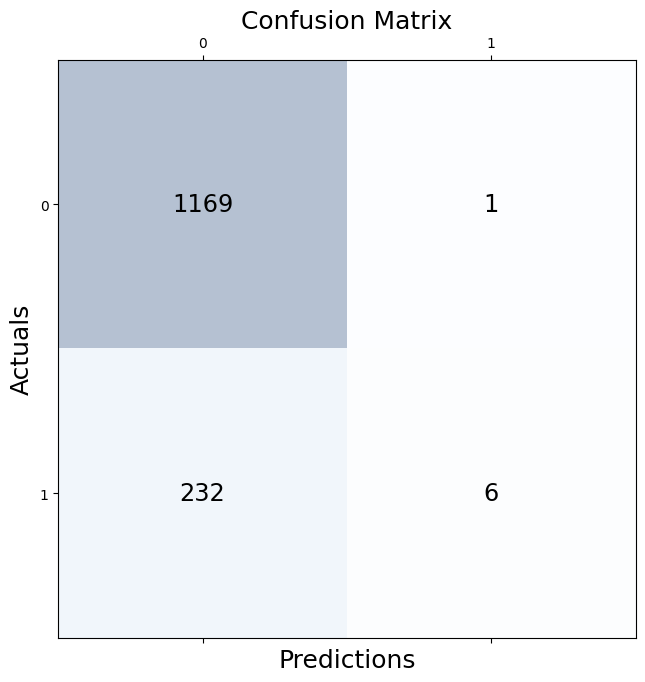

In [67]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(results, cmap=plt.cm.Blues, alpha=0.3)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(x=j, y=i,s=results[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [68]:
accuracy_score(y_train,train_pred4)

0.8387020369493131

In [69]:
results = confusion_matrix(y_train,train_pred4)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(y_train,train_pred4))
print ('Classification Report : ')
print (classification_report(y_train,train_pred4))

Confusion Matrix :
[[3512    0]
 [ 681   29]]
Accuracy Score is 0.8387020369493131
Classification Report : 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3512
           1       1.00      0.04      0.08       710

    accuracy                           0.84      4222
   macro avg       0.92      0.52      0.50      4222
weighted avg       0.86      0.84      0.77      4222



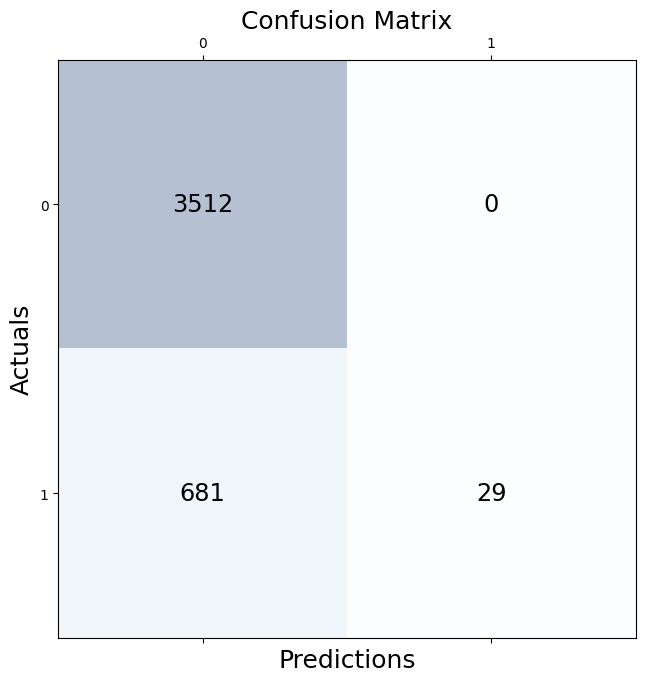

In [70]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(results, cmap=plt.cm.Blues, alpha=0.3)
for i in range(results.shape[0]):
    for j in range(results.shape[1]):
        ax.text(x=j, y=i,s=results[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [71]:
x_test

,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
3061,1,11,2.0,0,0,0,0,1,0,0,0,1
1379,1,3,2.0,0,0,0,1,0,0,0,1,0
2816,1,8,2.0,0,0,0,0,1,0,0,0,1
2697,1,3,2.0,0,0,1,0,0,0,0,1,0
3744,1,5,2.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1824,0,2,1.0,0,0,0,1,0,0,0,1,0
1657,1,1,2.0,0,0,0,1,0,0,0,1,0
2417,0,1,1.0,0,0,0,1,0,0,0,1,0
240,0,3,1.0,0,0,1,0,0,0,1,0,0


In [72]:
x= x_test.reset_index()

In [73]:
x

,index,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single
0,3061,1,11,2.0,0,0,0,0,1,0,0,0,1
1,1379,1,3,2.0,0,0,0,1,0,0,0,1,0
2,2816,1,8,2.0,0,0,0,0,1,0,0,0,1
3,2697,1,3,2.0,0,0,1,0,0,0,0,1,0
4,3744,1,5,2.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1824,0,2,1.0,0,0,0,1,0,0,0,1,0
1404,1657,1,1,2.0,0,0,0,1,0,0,0,1,0
1405,2417,0,1,1.0,0,0,0,1,0,0,0,1,0
1406,240,0,3,1.0,0,0,1,0,0,0,1,0,0


In [74]:
pred4

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
pred_churn = pd.DataFrame(pred2, columns =['Churn'])
pred_churn.head(2)

,Churn
0,0
1,0


In [76]:
x_test = x_test.reset_index()

In [77]:
graph_variable=pd.concat([x_test,pred_churn],axis='columns')
graph_variable.head(25)

,index,Gender,NumberOfAddress,OrderCount,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others,Divorced,Married,Single,Churn
0,3061,1,11,2.0,0,0,0,0,1,0,0,0,1,0
1,1379,1,3,2.0,0,0,0,1,0,0,0,1,0,0
2,2816,1,8,2.0,0,0,0,0,1,0,0,0,1,0
3,2697,1,3,2.0,0,0,1,0,0,0,0,1,0,0
4,3744,1,5,2.0,1,0,0,0,0,0,0,1,0,0
5,3905,1,2,2.0,0,0,0,0,1,0,0,0,1,0
6,3502,0,10,2.0,1,0,0,0,0,0,1,0,0,0
7,4929,0,3,2.0,0,0,0,0,1,0,0,1,0,0
8,3566,1,3,3.0,0,0,0,0,1,0,0,0,1,0
9,5160,0,11,2.0,0,0,0,0,1,0,0,1,0,0


In [78]:
graph_variable = graph_variable.reset_index()
test_dataset=graph_variable

In [79]:
dum = graph_variable[['Fashion','Grocery','Laptop & Accessory','Mobile & Accessory','Mobile Phone','Others']]
dum.head(5)

,Fashion,Grocery,Laptop & Accessory,Mobile & Accessory,Mobile Phone,Others
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [80]:
dum1=dum.to_numpy()
dum1

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

In [81]:
print(dum1[1] == [0, 0, 0, 1, 0, 0])

[ True  True  True  True  True  True]


In [82]:
arr= dum1
arr2=[]
for i in range(len(arr)):
  if arr[i][0]==1:
    arr2.append('Fashion')
  elif arr[i][1]==1:
    arr2.append('Grocery')
  elif arr[i][2]==1:
    arr2.append('Laptop & Accessory')
  elif arr[i][3]==1:
    arr2.append('Mobile & Accessory')
  elif arr[i][4]==1:
    arr2.append('Mobile Phone')
  else:
    arr2.append('Others')

print(arr2)
# dum2= pd.DataFrame(arr2, columns = ['Fashion','Grocery','Laptop & Accessory','Mobile & Accessory','Mobile Phone','Others'])
# dum2.head(5)

['Mobile Phone', 'Mobile & Accessory', 'Mobile Phone', 'Laptop & Accessory', 'Fashion', 'Mobile Phone', 'Fashion', 'Mobile Phone', 'Mobile Phone', 'Mobile Phone', 'Fashion', 'Mobile Phone', 'Fashion', 'Mobile Phone', 'Laptop & Accessory', 'Laptop & Accessory', 'Fashion', 'Laptop & Accessory', 'Mobile & Accessory', 'Laptop & Accessory', 'Laptop & Accessory', 'Fashion', 'Laptop & Accessory', 'Laptop & Accessory', 'Mobile Phone', 'Laptop & Accessory', 'Laptop & Accessory', 'Laptop & Accessory', 'Laptop & Accessory', 'Laptop & Accessory', 'Mobile Phone', 'Laptop & Accessory', 'Mobile Phone', 'Laptop & Accessory', 'Mobile & Accessory', 'Laptop & Accessory', 'Fashion', 'Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Grocery', 'Laptop & Accessory', 'Laptop & Accessory', 'Mobile & Accessory', 'Laptop & Accessory', 'Mobile Phone', 'Mobile Phone', 'Mobile Phone', 'Laptop & Accessory', 'Mobile Phone', 'Laptop & Accessory', 'Laptop & Accessory', 'Mobile & Accessory', 'Laptop & Accessory', 'Mobil

In [83]:
Prefered1 = pd.DataFrame(arr2, columns = ['PreferedOrderCat'])
Prefered1

,PreferedOrderCat
0,Mobile Phone
1,Mobile & Accessory
2,Mobile Phone
3,Laptop & Accessory
4,Fashion
...,...
1403,Mobile & Accessory
1404,Mobile & Accessory
1405,Mobile & Accessory
1406,Laptop & Accessory


In [84]:
dumi = graph_variable[['Divorced',	'Married',	'Single']]
dumi.head(5)

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [85]:
dumi1=dumi.to_numpy()
dumi1

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [86]:
arr= dumi1
arr2=[]
for i in range(len(arr)):
  if arr[i][0]==1:
    arr2.append('Divorced')
  elif arr[i][1]==1:
    arr2.append('Married')
  else:
    arr2.append('Single')

In [87]:
print(arr2)

['Single', 'Married', 'Single', 'Married', 'Married', 'Single', 'Divorced', 'Married', 'Single', 'Married', 'Married', 'Married', 'Married', 'Single', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Married', 'Divorced', 'Divorced', 'Married', 'Divorced', 'Single', 'Single', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Divorced', 'Single', 'Married', 'Married', 'Divorced', 'Married', 'Single', 'Married', 'Divorced', 'Divorced', 'Married', 'Single', 'Married', 'Married', 'Single', 'Married', 'Single', 'Married', 'Single', 'Married', 'Married', 'Divorced', 'Married', 'Married', 'Single', 'Married', 'Divorced', 'Divorced', 'Single', 'Single', 'Married', 'Divorced', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Single', 'Married', 'Married', 'Married', 'Married', 'Married', 'Married', 'Single', 'Married', 'Divorced', 'Married', 'Single', 'Married', 'Married', 'Divorced', 'Single', 'Single', 'Divorced', 'Married', 'Divorced', 'Sin

In [88]:
marrital1 = pd.DataFrame(arr2, columns = ['MaritalStatus'])
marrital1

,MaritalStatus
0,Single
1,Married
2,Single
3,Married
4,Married
...,...
1403,Married
1404,Married
1405,Married
1406,Divorced


In [89]:
x_test.shape

(1408, 13)

In [90]:
marged_test_data=pd.concat([graph_variable,Prefered1,marrital1],axis='columns')
dt1=marged_test_data.drop(['Fashion','Grocery','Laptop & Accessory','Mobile & Accessory','Mobile Phone','Others','Divorced',	'Married',	'Single'],axis='columns')
graph_variable=dt1

In [91]:
import plotly.graph_objects as go

In [127]:
churned_male=0
churned_female=0
not_churned_male=0
not_churned_female=0
for i in range(0,graph_variable['Gender'].count()):
  if graph_variable['Churn'][i] == 1:
    if graph_variable['Gender'][i] == 1:
      churned_male=churned_male+1
    else:
      churned_female=churned_female+1
  else:# dataset['Churn'][i] == 0:
    if graph_variable['Gender'][i] == 1:
      not_churned_male=not_churned_male+1
    else:
      not_churned_female=not_churned_female+1



gen=['Male', 'Female']

fig = go.Figure(data=[
    go.Bar(name='Not Churned', x=gen, y=[not_churned_male,not_churned_female],marker_color='grey',marker_pattern_shape='+'),
    go.Bar(name='Churned', x=gen, y=[churned_male, churned_female],marker_color='grey',marker_opacity=1, marker_pattern_shape='\\', marker_line_width = 3,marker_line_color='black')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title="Based On Gender Customer Churn vs Not Churned",
    xaxis_title="Gender",
    yaxis_title="Count",
    legend_title="Customer",

)
fig.update_layout(
    autosize=False,
    width=803,
    height=446,
)
fig.show()

In [128]:
c_Laptop_and_Accessory=0
n_Laptop_and_Accessory=0
c_Mobile_and_Accessory=0
n_Mobile_and_Accessory=0
c_Mobile_Phone=0
n_Mobile_Phone=0
c_Fashion=0
n_Fashion=0
c_Grocery=0
n_Grocery=0
c_others=0
n_others=0


for i in range(0,graph_variable['PreferedOrderCat'].count()):
  if graph_variable['Churn'][i] == 1:
    if graph_variable['PreferedOrderCat'][i] == 'Fashion':
      c_Fashion=c_Fashion+1
    elif graph_variable['PreferedOrderCat'][i] == 'Grocery':
      c_Grocery=c_Grocery+1
    elif graph_variable['PreferedOrderCat'][i] == 'Laptop & Accessory':
      c_Laptop_and_Accessory=c_Laptop_and_Accessory+1
    elif graph_variable['PreferedOrderCat'][i] == 'Mobile & Accessory':
      c_Mobile_and_Accessory=c_Mobile_and_Accessory+1
    elif graph_variable['PreferedOrderCat'][i] == 'Mobile Phone':
      c_Mobile_Phone=c_Mobile_Phone+1
    else:
      c_others=c_others+1
  else:# dataset['Churn'][i] == 0:
    if graph_variable['PreferedOrderCat'][i] == 'Fashion':
      n_Fashion=n_Fashion+1
    elif graph_variable['PreferedOrderCat'][i] == 'Grocery':
      n_Grocery=n_Grocery+1
    elif graph_variable['PreferedOrderCat'][i] == 'Laptop & Accessory':
      n_Laptop_and_Accessory=n_Laptop_and_Accessory+1
    elif graph_variable['PreferedOrderCat'][i] == 'Mobile & Accessory':
      n_Mobile_and_Accessory=n_Mobile_and_Accessory+1
    elif graph_variable['PreferedOrderCat'][i] == 'Mobile Phone':
      n_Mobile_Phone=n_Mobile_Phone+1
    else:
      n_others=n_others+1

catagoies=['Fashion','Grocery','Laptop & Accessory','Mobile & Accessory','Mobile Phone','Others']

fig = go.Figure(data=[
    go.Bar(name='Not Churned', x=catagoies, y=[n_Fashion, n_Grocery,n_Laptop_and_Accessory,n_Mobile_and_Accessory,n_Mobile_Phone,n_others],marker_color='grey',marker_pattern_shape='+'),
    go.Bar(name='Churned', x=catagoies, y=[c_Fashion, c_Grocery,c_Laptop_and_Accessory,c_Mobile_and_Accessory,c_Mobile_Phone,c_others],marker_color='grey',marker_opacity=1, marker_pattern_shape='\\', marker_line_width = 3,marker_line_color='black')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title="Based On Prefered Order Categories Customer Churn vs Not Churned",
    xaxis_title="Prefered Order Categories",
    yaxis_title="Count",
    legend_title="Customer",

)
fig.update_layout(
    autosize=False,
    width=803,
    height=446,
)
fig.show()

In [125]:
c_Single=0
n_Single=0
c_Married=0
n_Married=0
c_Divorced=0
n_Divorced=0


for i in range(0,graph_variable['MaritalStatus'].count()):
  if graph_variable['Churn'][i] == 1:
    if graph_variable['MaritalStatus'][i] == 'Single':
      c_Single=c_Single+1
    elif graph_variable['MaritalStatus'][i] == 'Married':
      c_Married=c_Married+1
    else:
      c_Divorced=c_Divorced+1
  else:# dataset['Churn'][i] == 0:
    if graph_variable['MaritalStatus'][i] == 'Single':
      n_Single=n_Single+1
    elif graph_variable['MaritalStatus'][i] == 'Married':
      n_Married=n_Married+1
    else:
      n_Divorced=n_Divorced+1

import plotly.graph_objects as go
marrital=['Single','Married','Divorced']

fig = go.Figure(data=[
    go.Bar(name='Not Churned', x=marrital, y=[n_Single, n_Married,n_Divorced],marker_color='grey',marker_pattern_shape='+'),
    go.Bar(name='Churned', x=marrital, y=[c_Single, c_Married,c_Divorced],marker_color='grey',marker_opacity=1, marker_pattern_shape='\\', marker_line_width = 3,marker_line_color='black')
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(
    title="Based On Marrital Status Customer Churn vs Not Churned",
    xaxis_title="Marital Status",
    yaxis_title="Count",
    legend_title="Customer",

)
fig.update_layout(
    autosize=False,
    width=803,
    height=446,
)

fig.show()

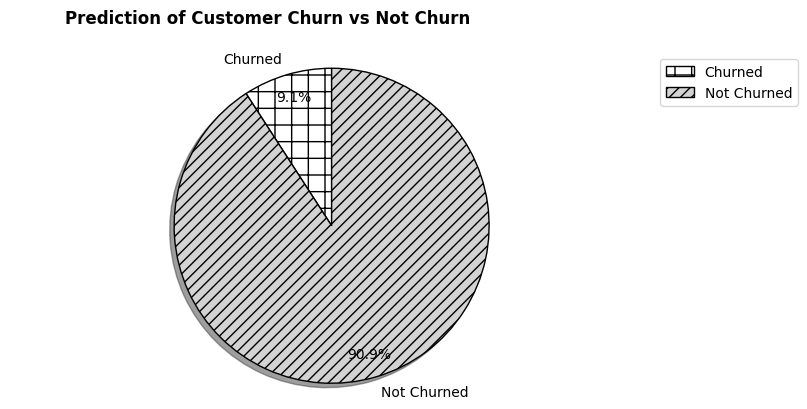

In [119]:
import matplotlib.pyplot as plt

# Sample data
labels = ['Churned','Not Churned']
sizes = [128, 1272]
colors = [ 'white','lightgray']

# Define patterns for each segment
patterns = ['+','\\', '///']

#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8.3, 4.5))
ax.pie(sizes, labels=labels,  autopct='%1.1f%%', startangle=90,
       pctdistance=0.85, shadow=True,colors=colors,wedgeprops={'edgecolor': 'black'})

# Apply patterns to each wedge
for wedge, pattern in zip(ax.patches, patterns):
    wedge.set_hatch(pattern)

ax.legend( labels, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Prediction of Customer Churn vs Not Churn',x= 0.4, y=1.06, fontweight='bold')

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()